Based on the 2nd [snnTorch tutorial](https://snntorch.readthedocs.io/en/latest/tutorials/tutorial_2.html)

In [1]:
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Plotting Functions

#@title Plotting Settings
def plot_mem(mem, title=False):
  if title:
    plt.title(title)
  plt.plot(mem)
  plt.xlabel("Time step")
  plt.ylabel("Membrane Potential")
  plt.xlim([0, 50])
  plt.ylim([0, 1])
  plt.show()

def plot_step_current_response(cur_in, mem_rec, vline1):
  fig, ax = plt.subplots(2, figsize=(8,6),sharex=True)

  # Plot input current
  ax[0].plot(cur_in, c="tab:orange")
  ax[0].set_ylim([0, 0.2])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  ax[0].set_title("Lapicque's Neuron Model With Step Input")

  # Plot membrane potential
  ax[1].plot(mem_rec)
  ax[1].set_ylim([0, 0.6]) 
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")

  if vline1:
    ax[1].axvline(x=vline1, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  plt.xlabel("Time step")

  plt.show()


def plot_current_pulse_response(cur_in, mem_rec, title, vline1=False, vline2=False, ylim_max1=False):

  fig, ax = plt.subplots(2, figsize=(8,6),sharex=True)

  # Plot input current
  ax[0].plot(cur_in, c="tab:orange")
  if not ylim_max1:
    ax[0].set_ylim([0, 0.2])
  else:
    ax[0].set_ylim([0, ylim_max1])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  ax[0].set_title(title)

  # Plot membrane potential
  ax[1].plot(mem_rec)
  ax[1].set_ylim([0, 1])
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")

  if vline1:
    ax[1].axvline(x=vline1, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  if vline2:
    ax[1].axvline(x=vline2, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  plt.xlabel("Time step")

  plt.show()

def compare_plots(cur1, cur2, cur3, mem1, mem2, mem3, vline1, vline2, vline3, vline4, title):
  # Generate Plots
  fig, ax = plt.subplots(2, figsize=(8,6),sharex=True)

  # Plot input current
  ax[0].plot(cur1)
  ax[0].plot(cur2)
  ax[0].plot(cur3)
  ax[0].set_ylim([0, 0.2])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  ax[0].set_title(title)

  # Plot membrane potential
  ax[1].plot(mem1)
  ax[1].plot(mem2)
  ax[1].plot(mem3)
  ax[1].set_ylim([0, 1])
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")

  ax[1].axvline(x=vline1, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  ax[1].axvline(x=vline2, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  ax[1].axvline(x=vline3, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  ax[1].axvline(x=vline4, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)

  plt.xlabel("Time step")

  plt.show()

def plot_cur_mem_spk(cur, mem, spk, thr_line=False, vline=False, title=False, ylim_max2=1.25):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,6), sharex=True, 
                        gridspec_kw = {'height_ratios': [1, 1, 0.4]})

  # Plot input current
  ax[0].plot(cur, c="tab:orange")
  ax[0].set_ylim([0, 0.4])
  ax[0].set_xlim([0, 200])
  ax[0].set_ylabel("Input Current ($I_{in}$)")
  if title:
    ax[0].set_title(title)

  # Plot membrane potential
  ax[1].plot(mem)
  ax[1].set_ylim([0, ylim_max2]) 
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")
  if thr_line:
    ax[1].axhline(y=thr_line, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
  plt.xlabel("Time step")

  # Plot output spike using spikeplot
  splt.raster(spk, ax[2], s=400, c="black", marker="|")
  if vline:
    ax[2].axvline(x=vline, ymin=0, ymax=6.75, alpha = 0.15, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False)
  plt.ylabel("Output spikes")
  plt.yticks([]) 

  plt.show()

def plot_spk_mem_spk(spk_in, mem, spk_out, title):
  # Generate Plots
  fig, ax = plt.subplots(3, figsize=(8,6), sharex=True, 
                        gridspec_kw = {'height_ratios': [0.4, 1, 0.4]})

  # Plot input current
  splt.raster(spk_in, ax[0], s=400, c="black", marker="|")
  ax[0].set_ylabel("Input Spikes")
  ax[0].set_title(title)
  plt.yticks([]) 

  # Plot membrane potential
  ax[1].plot(mem)
  ax[1].set_ylim([0, 1])
  ax[1].set_ylabel("Membrane Potential ($U_{mem}$)")
  ax[1].axhline(y=0.5, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
  plt.xlabel("Time step")

  # Plot output spike using spikeplot
  splt.raster(spk_rec, ax[2], s=400, c="black", marker="|")
  plt.ylabel("Output spikes")
  plt.yticks([]) 

  plt.show()


def plot_reset_comparison(spk_in, mem_rec, spk_rec, mem_rec0, spk_rec0):
  # Generate Plots to Compare Reset Mechanisms
  fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,6), sharex=True, 
                        gridspec_kw = {'height_ratios': [0.4, 1, 0.4], 'wspace':0.05})

  # Reset by Subtraction: input spikes
  splt.raster(spk_in, ax[0][0], s=400, c="black", marker="|")
  ax[0][0].set_ylabel("Input Spikes")
  ax[0][0].set_title("Reset by Subtraction")
  ax[0][0].set_yticks([])

  # Reset by Subtraction: membrane potential 
  ax[1][0].plot(mem_rec)
  ax[1][0].set_ylim([0, 0.7])
  ax[1][0].set_ylabel("Membrane Potential ($U_{mem}$)")
  ax[1][0].axhline(y=0.5, alpha=0.25, linestyle="dashed", c="black", linewidth=2)

  # Reset by Subtraction: output spikes
  splt.raster(spk_rec, ax[2][0], s=400, c="black", marker="|")
  ax[2][0].set_yticks([])
  ax[2][0].set_xlabel("Time step")
  ax[2][0].set_ylabel("Output Spikes")

  # Reset to Zero: input spikes
  splt.raster(spk_in, ax[0][1], s=400, c="black", marker="|")
  ax[0][1].set_title("Reset to Zero")
  ax[0][1].set_yticks([])

  # Reset to Zero: membrane potential
  ax[1][1].plot(mem_rec0)
  ax[1][1].set_ylim([0, 0.7])
  ax[1][1].axhline(y=0.5, alpha=0.25, linestyle="dashed", c="black", linewidth=2)
  ax[1][1].set_yticks([])
  ax[2][1].set_xlabel("Time step")

  # Reset to Zero: output spikes
  splt.raster(spk_rec0, ax[2][1], s=400, c="black", marker="|")
  ax[2][1].set_yticks([])

  plt.show()

In [2]:
# Example LIF Neuron

def leaky_integtate_neuron(U, time_step = 1e-3, I = 0, R = 5e7, C = 1e-10):
    tau = R * C
    U = U + (time_step / tau) * (-U + (R * I))
    
    return U

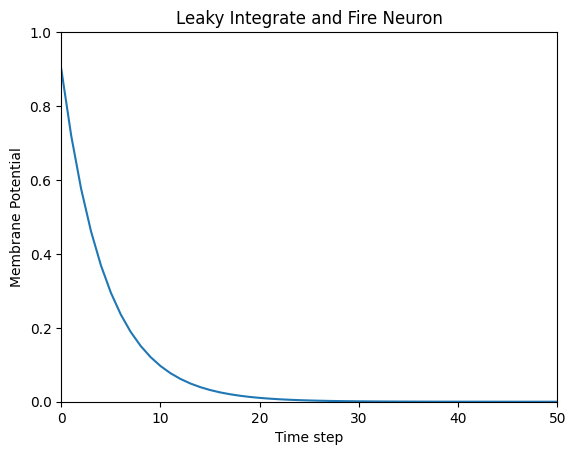

In [12]:
# Iterate over function
num_steps = 100
U = 0.9
U_trace = []

for i in range(num_steps):
    U_trace.append(U)
    U = leaky_integtate_neuron(U)

plot_mem(U_trace, 'Leaky Integrate and Fire Neuron')

# Lapicque's LIF Model

## Without Stimulus

In [17]:
time_step = 1e-3
R = 5
C = 1e-3

# Create LIF neuron
lif1 = snn.Lapicque(R = R, C = C, time_step = time_step)

In [14]:
# Initialize membrane input & output

mem = torch.ones(1) * 0.9 # initialize at 0.9V for t = 0
cur_in = torch.zeros(num_steps) # I = 0 for all t for this submodule
spk_out = torch.zeros(1) # initialize output spikes

# Create list to record membrane potential over time

mem_rec = [mem]

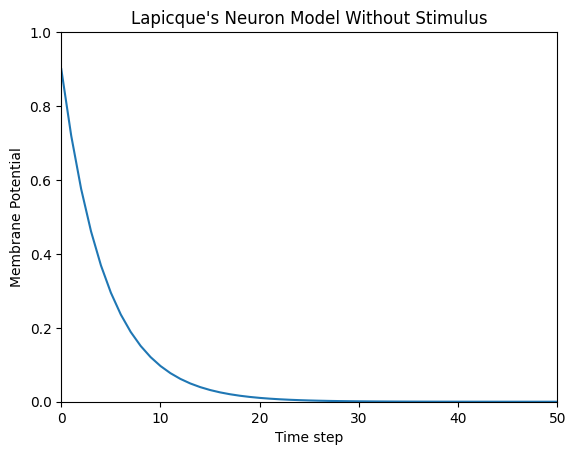

In [18]:
# Run a simulation!

# Pass updated value for mem and cur_in[step] = 0 at every timestep

for step in range(num_steps):
    spk_out, mem = lif1(cur_in[step], mem)
    
    mem_rec.append(mem)
    
# Convert list of tensors into a single tensor

mem_rec = torch.stack(mem_rec)

# Plot using predefined function

plot_mem(mem_rec, "Lapicque's Neuron Model Without Stimulus")

## Step Input

In [28]:
# Initialize input current pulse (current of 100mA turns on at time = 10ms)

cur_in = torch.cat((torch.zeros(10), torch.ones(190) * 0.1), 0)

# Initialize membrane, output, and recordings

mem = torch.zeros(1) # Membrane potential is 0 at t=0
spk_out = torch.zeros(1) # Where neuron can sequentially dump it's output spikes
mem_rec = [mem]


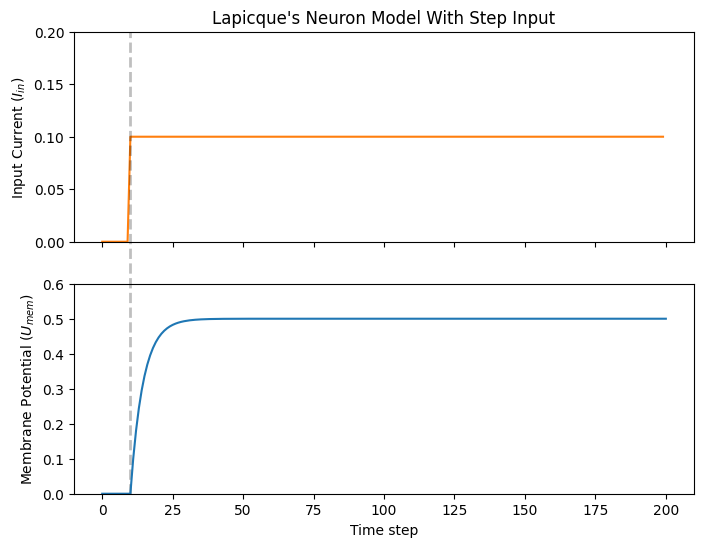

In [29]:
num_steps = 200

# Pass updated values for input into neuron at each time step

for step in range(num_steps):
    spk_out, mem = lif1(cur_in[step], mem)
    mem_rec.append(mem)
    
# Crunch list of tensors into single tensor

mem_rec = torch.stack(mem_rec)

plot_step_current_response(cur_in, mem_rec, 10)    

In [30]:
print(f"The calculated value of input pulse [A] x resistance [Ω] is: {cur_in[11]*lif1.R} V")

print(f"The simulated value of steady-state membrane potential is: {mem_rec[200][0]} V")

The calculated value of input pulse [A] x resistance [Ω] is: 0.5 V
The simulated value of steady-state membrane potential is: 0.4999999403953552 V


## Pulse Input

In [34]:
# Initialize current pulse, membrane, and outputs

cur_in1 = torch.cat((torch.zeros(10), torch.ones(20) * 0.1, torch.zeros(170)), 0)
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec1 = [mem]

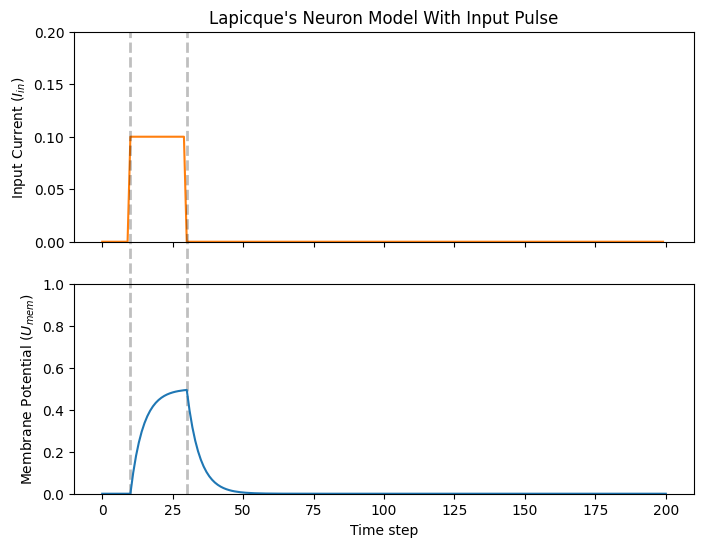

In [35]:
# Neuron Simulation

for step in range(num_steps):
    spk_out, mem = lif1(cur_in1[step], mem)
    mem_rec1.append(mem)

mem_rec1 = torch.stack(mem_rec1)

plot_current_pulse_response(cur_in1, mem_rec1, 
                            "Lapicque's Neuron Model With Input Pulse",
                           vline1 = 10, vline2 = 30)

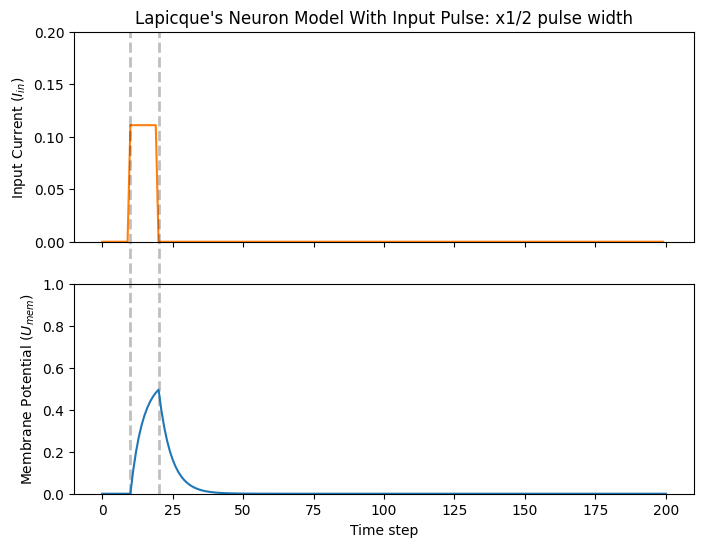

In [36]:
# Increase amplitude of current pulse; half the time.

cur_in2 = torch.cat((torch.zeros(10), torch.ones(10) * 0.111, torch.zeros(180)), 0)  # input turns on at t=10, off at t=20
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec2 = [mem]

# Neuron simulation

for step in range(num_steps):
  spk_out, mem = lif1(cur_in2[step], mem)
  mem_rec2.append(mem)
    
mem_rec2 = torch.stack(mem_rec2)

plot_current_pulse_response(cur_in2, mem_rec2, "Lapicque's Neuron Model With Input Pulse: x1/2 pulse width",
                            vline1=10, vline2=20)

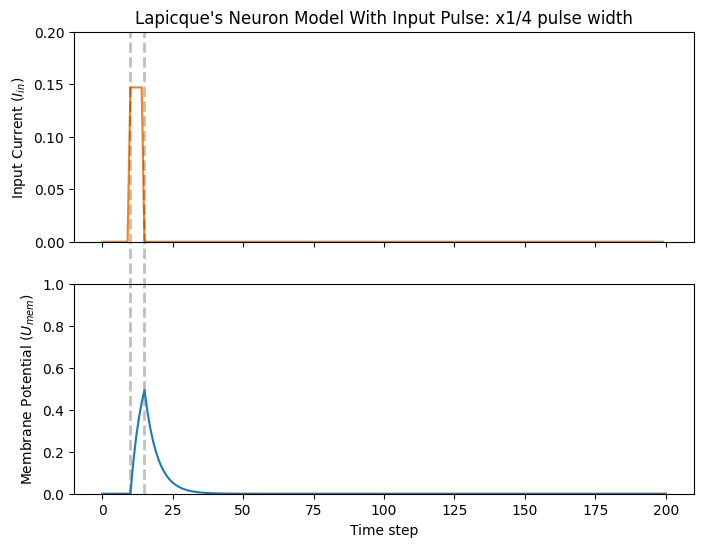

In [37]:
# Increase amplitude of current pulse; quarter the time.

cur_in3 = torch.cat((torch.zeros(10), torch.ones(5) * 0.147, torch.zeros(185)), 0)  # input turns on at t=10, off at t=15
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec3 = [mem]

# Neuron simulation

for step in range(num_steps):
  spk_out, mem = lif1(cur_in3[step], mem)
  mem_rec3.append(mem)
mem_rec3 = torch.stack(mem_rec3)

plot_current_pulse_response(cur_in3, mem_rec3, "Lapicque's Neuron Model With Input Pulse: x1/4 pulse width",
                            vline1=10, vline2=15)

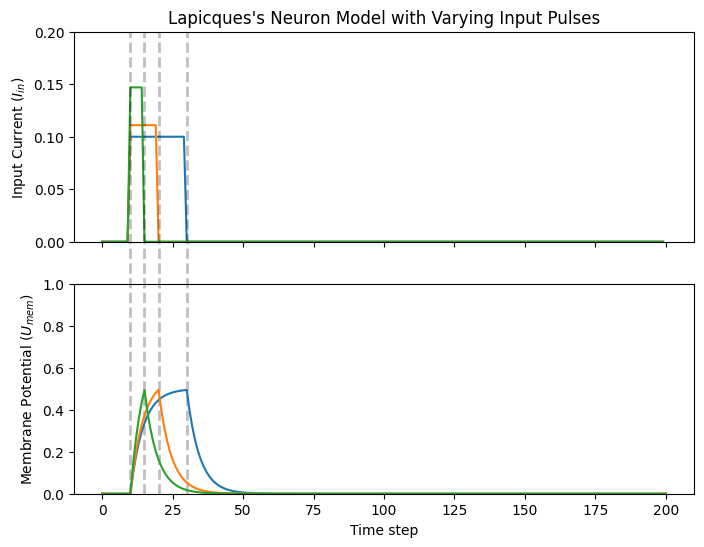

In [38]:
# Compare all 3 experiments on the same plot

compare_plots(cur_in1, cur_in2, cur_in3,
             mem_rec1, mem_rec2, mem_rec3,
             10, 15, 20, 30,
             "Lapicques's Neuron Model with Varying Input Pulses")

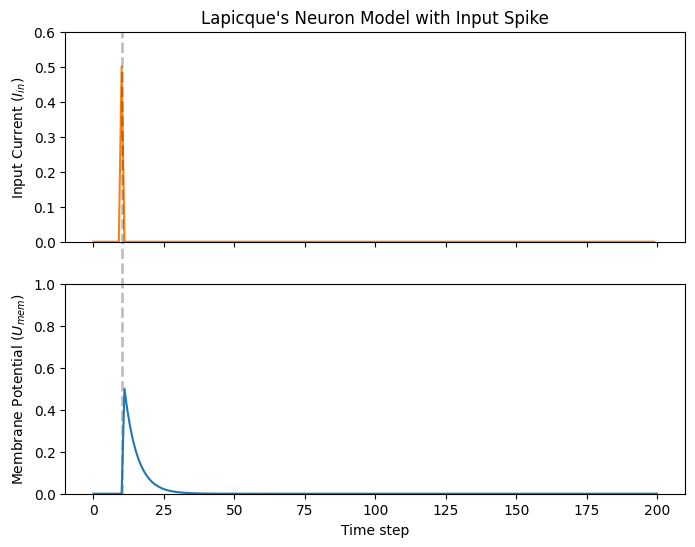

In [41]:
# Current spike input

cur_in4 = torch.cat((torch.zeros(10), torch.ones(1) * 0.5, torch.zeros(189)), 0)
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec4 = [mem]

# Neuron stimulation

for step in range(num_steps):
    spk_out, mem = lif1(cur_in4[step], mem)
    mem_rec4.append(mem)
    
mem_rec4 = torch.stack(mem_rec4)

plot_current_pulse_response(cur_in4, mem_rec4, "Lapicque's Neuron Model with Input Spike",
                           vline1 = 10, ylim_max1 = 0.6)

## Firing

In [42]:
# Adding a threshold to the previous model

def leaky_integrate_and_fire(mem, cur = 0, threshold = 1, time_step = 1e-3, R = 5.1, C = 5e-3):
    tau_mem = R * C
    spk = (mem > threshold) # If membrane exceeds threshold, spk = 1, else spk = 0
    mem = mem + (time_step/tau_mem) * (-mem + cur * R)
    
    return mem, spk

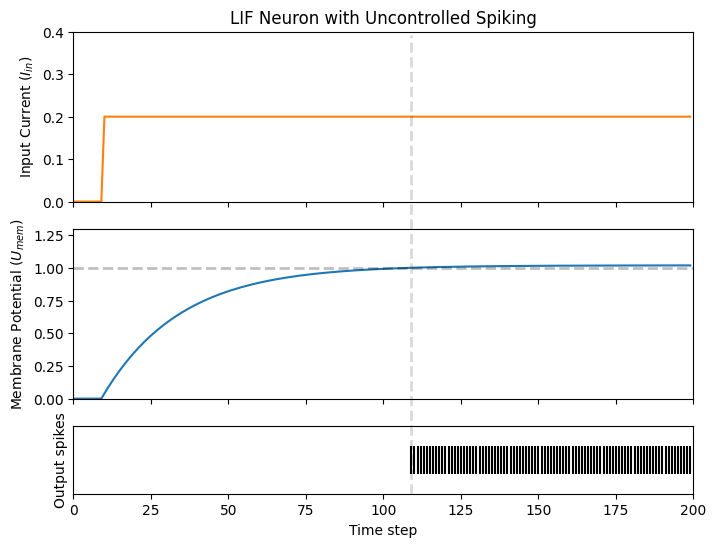

In [45]:
# Small step current input

cur_in = torch.cat((torch.zeros(10), torch.ones(190) * 0.2), 0)
mem = torch.zeros(1)
mem_rec = []
spk_rec = []

# Neuron stimulation

for step in range(num_steps):
    mem, spk = leaky_integrate_and_fire(mem, cur_in[step])
    mem_rec.append(mem)
    spk_rec.append(spk)

mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

plot_cur_mem_spk(cur_in, mem_rec, spk_rec, thr_line = 1, vline = 109,
                ylim_max2 = 1.3, title = 'LIF Neuron with Uncontrolled Spiking')

In [46]:
# Implementing reset mechanism

def leaky_integrate_and_fire(mem, cur = 0, threshold = 1, time_step = 1e-3, R = 5.1, C = 5e-3):
    tau_mem = R * C
    spk = (mem > threshold)
    mem = mem + (time_step / tau_mem) * (-mem + cur * R) - spk * threshold
    return mem, spk

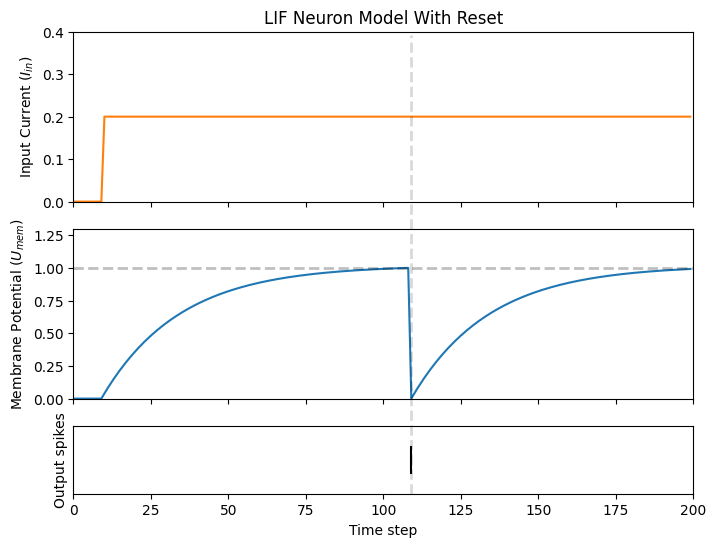

In [47]:
# Small step current input
cur_in = torch.cat((torch.zeros(10), torch.ones(190) * 0.2), 0)
mem = torch.zeros(1)
mem_rec = []
spk_rec = []

# neuron simulation
for step in range(num_steps):
  mem, spk = leaky_integrate_and_fire(mem, cur_in[step])
  mem_rec.append(mem)
  spk_rec.append(spk)

# convert lists to tensors
mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

plot_cur_mem_spk(cur_in, mem_rec, spk_rec, thr_line = 1, vline = 109, ylim_max2 = 1.3,
                 title = "LIF Neuron Model With Reset")

In [49]:
# Implement the above with snnTorch

lif2 = snn.Lapicque(R = 5.1, C = 5e-3, time_step = 1e-3)

print(f'Membrane potential time constant: {lif2.R * lif2.C}s')

Membrane potential time constant: 0.025499999523162842s


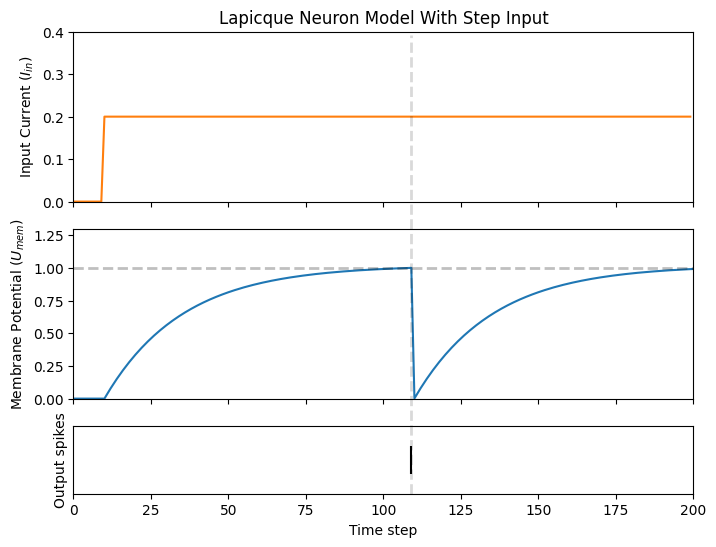

In [50]:
# Initialize inputs and outputs

cur_in = torch.cat((torch.zeros(10), torch.ones(190) * 0.2), 0)
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec = [mem]
spk_rec = [spk_out]

# Simulation run across 100 time steps

for step in range(num_steps):
  spk_out, mem = lif2(cur_in[step], mem)
  mem_rec.append(mem)
  spk_rec.append(spk_out)

# Convert lists to tensors

mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

plot_cur_mem_spk(cur_in, mem_rec, spk_rec, thr_line = 1, vline = 109, ylim_max2 = 1.3,
                 title = "Lapicque Neuron Model With Step Input")

In [54]:
print(spk_rec[105:115].view(-1))

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])


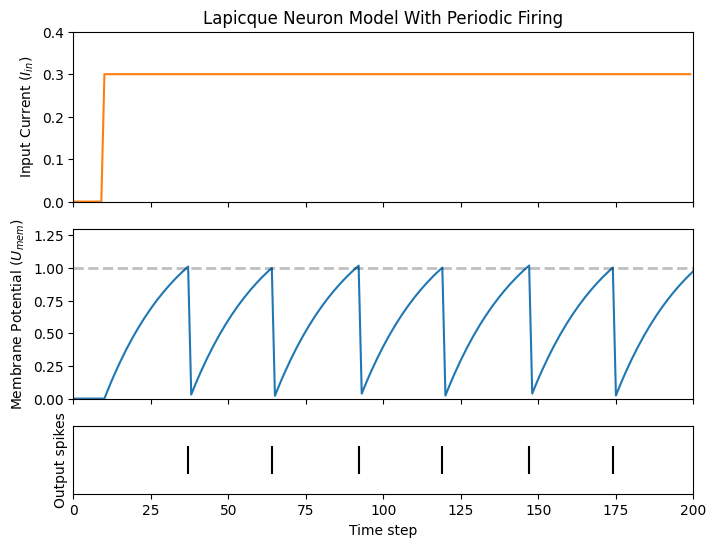

In [55]:
# Increasing input current

# Initialize inputs and outputs

cur_in = torch.cat((torch.zeros(10), torch.ones(190) * 0.3), 0)  # increased current
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec = [mem]
spk_rec = [spk_out]

# Neuron simulation

for step in range(num_steps):
  spk_out, mem = lif2(cur_in[step], mem)
  mem_rec.append(mem)
  spk_rec.append(spk_out)

# Convert lists to tensors

mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)


plot_cur_mem_spk(cur_in, mem_rec, spk_rec, thr_line = 1, ylim_max2 = 1.3,
                 title = "Lapicque Neuron Model With Periodic Firing")

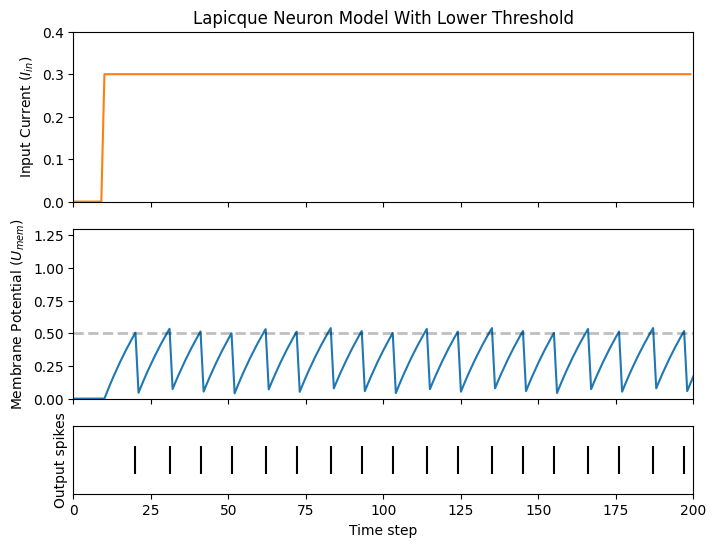

In [56]:
# Experimenting with a halved threshold

lif3 = snn.Lapicque(R = 5.1, C = 5e-3, time_step = 1e-3, threshold = 0.5)


# Initialize inputs and outputs

cur_in = torch.cat((torch.zeros(10), torch.ones(190) * 0.3), 0)
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec = [mem]
spk_rec = [spk_out]

# Neuron simulation

for step in range(num_steps):
  spk_out, mem = lif3(cur_in[step], mem)
  mem_rec.append(mem)
  spk_rec.append(spk_out)

# Convert lists to tensors

mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

plot_cur_mem_spk(cur_in, mem_rec, spk_rec, thr_line = 0.5, ylim_max2 = 1.3,
                 title = "Lapicque Neuron Model With Lower Threshold")

## Spike Inputs

In [57]:
# Create a 1-D randomw spike train where each element has a 40% probability of firing

spk_in = spikegen.rate_conv(torch.ones((num_steps)) * 0.40)

In [59]:
print(f'There are {int(sum(spk_in))} total spikes out of {int(len(spk_in))} time steps')

There are 83 total spikes out of 200 time steps


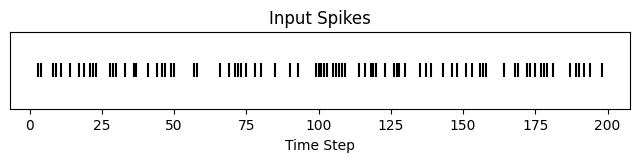

In [60]:
fig = plt.figure(facecolor = 'w', figsize = (8, 1))
ax = fig.add_subplot(111)

splt.raster(spk_in.reshape(num_steps, -1), ax, s = 100, c = 'black', marker = '|')
plt.title('Input Spikes')
plt.xlabel('Time Step')
plt.yticks([])
plt.show()

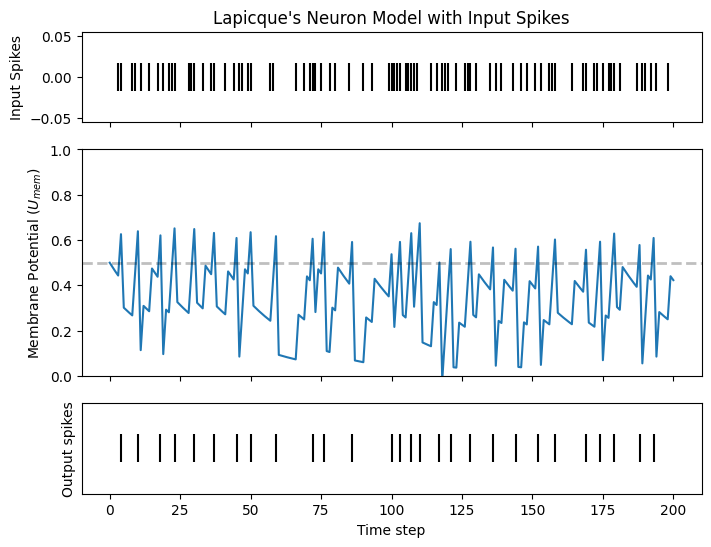

In [62]:
# Use simulated spikes as input current

# Initialize inputs and outputs

mem = torch.ones(1) * 0.5
spk_out = torch.zeros(1)
mem_rec = [mem]
spk_rec = [spk_out]

# Neuron simulation

for step in range(num_steps):
    spk_out, mem = lif3(spk_in[step], mem)
    spk_rec.append(spk_out)
    mem_rec.append(mem)

# Convert lists to tensors

mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

plot_spk_mem_spk(spk_in, mem_rec, spk_out, "Lapicque's Neuron Model with Input Spikes")

## Reset Mechanisms

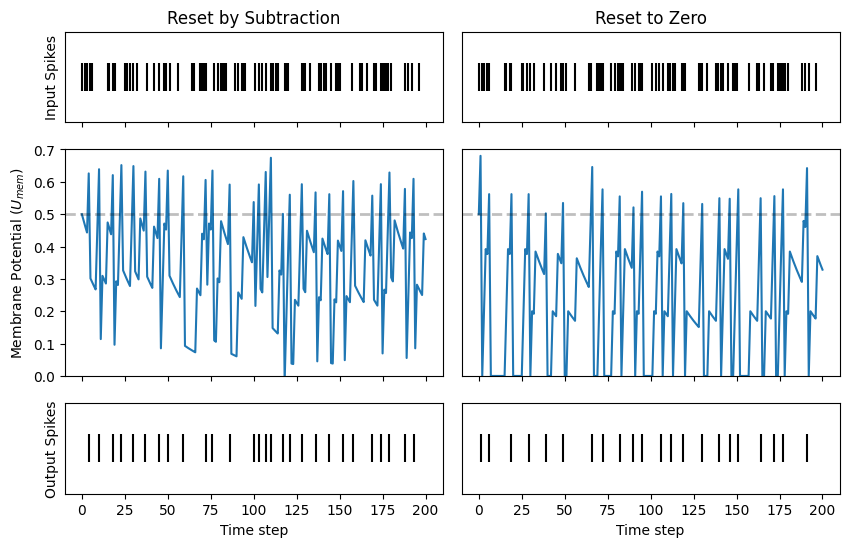

In [65]:
# Create another neuron model to try the 'reset_mechanism' parameter ('subtract' by default)

lif4 = snn.Lapicque(R = 5.1, C = 5e-3, time_step = 1e-3, threshold = 0.5, reset_mechanism = 'zero')

# Initialize inputs and outputs
spk_in = spikegen.rate_conv(torch.ones((num_steps)) * 0.40)
mem = torch.ones(1) * 0.5
spk_out = torch.zeros(1)
mem_rec0 = [mem]
spk_rec0 = [spk_out]

# Neuron simulation

for step in range(num_steps):
    spk_out, mem = lif4(spk_in[step], mem)
    spk_rec0.append(spk_out)
    mem_rec0.append(mem)
    
spk_rec0 = torch.stack(spk_rec0)
mem_rec0 = torch.stack(mem_rec0)

plot_reset_comparison(spk_in, mem_rec, spk_rec, mem_rec0, spk_rec0)